# 1 Importações do csv e limpeza do dataset

In [47]:
import pandas as pd

df = pd.read_csv('./data/data.csv', encoding="ISO-8859-1")

df.head()

df_filtrado = df.drop_duplicates()

df_filtrado

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# 2 Análise exploratória dos dados

In [48]:
## Análises estatísticas

colunas_para_analise = [
    'Quantity',
    'UnitPrice'
]

estatisticas = {}

for coluna in colunas_para_analise:
    estatisticas[coluna] = {
        'Media': df_limpo[coluna].mean(),
        'Mediana': df_limpo[coluna].median(),
        'Moda': df_limpo[coluna].mode()[0],  # Pegando o primeiro valor da moda (caso haja múltiplas modas)
        'Desvio Padrão': df_limpo[coluna].std()
    }

estatisticas_df = pd.DataFrame(estatisticas)
estatisticas_df

,Quantity,UnitPrice
Media,9.620029,4.632656
Mediana,3.000000,2.080000
Moda,1.000000,1.250000
Desvio Padrão,219.130156,97.233118


In [49]:
## Produtos mais vendidos

produtos_mais_vendidos = df_limpo.groupby('Description')['Quantity'].sum().reset_index()
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='Quantity', ascending=False)
produtos_mais_vendidos.head(10)

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
1866,JUMBO BAG RED RETROSPOT,47260
2740,POPCORN HOLDER,36322
244,ASSORTED COLOUR BIRD ORNAMENT,36282
2395,PACK OF 72 RETROSPOT CAKE CASES,36016
3918,WHITE HANGING HEART T-LIGHT HOLDER,35298
2803,RABBIT NIGHT LIGHT,30631
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26299
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24719


In [50]:
# Clientes mais valiosos
df_limpo['TotalSpent'] = df_limpo['Quantity'] * df_limpo['UnitPrice']

clientes_mais_valiosos = df_limpo.groupby('CustomerID')['TotalSpent'].sum().reset_index()
clientes_mais_valiosos = clientes_mais_valiosos.sort_values(by='TotalSpent', ascending=False)
clientes_mais_valiosos.head(10)

,CustomerID,TotalSpent
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187322.17
1895,14911.0,132458.73
55,12415.0,123725.45
1345,14156.0,113214.59
3801,17511.0,88125.38
3202,16684.0,65892.08
1005,13694.0,62690.54
2192,15311.0,59284.19


In [51]:
# Período de maior volume de vendas
df_limpo['InvoiceDate'] = pd.to_datetime(df_limpo['InvoiceDate'])

df_limpo['Ano_Mes'] = df_limpo['InvoiceDate'].dt.to_period('M')
periodos_maior_volume = df_limpo.groupby('Ano_Mes')['Quantity'].sum().reset_index()
periodos_maior_volume = periodos_maior_volume.sort_values(by='Quantity', ascending=False)
periodos_maior_volume.head(10)

,Ano_Mes,Quantity
11,2011-11,737182
10,2011-10,569749
9,2011-09,548669
8,2011-08,405450
7,2011-07,389051
5,2011-05,379652
3,2011-03,351165
0,2010-12,341038
6,2011-06,340945
1,2011-01,308281


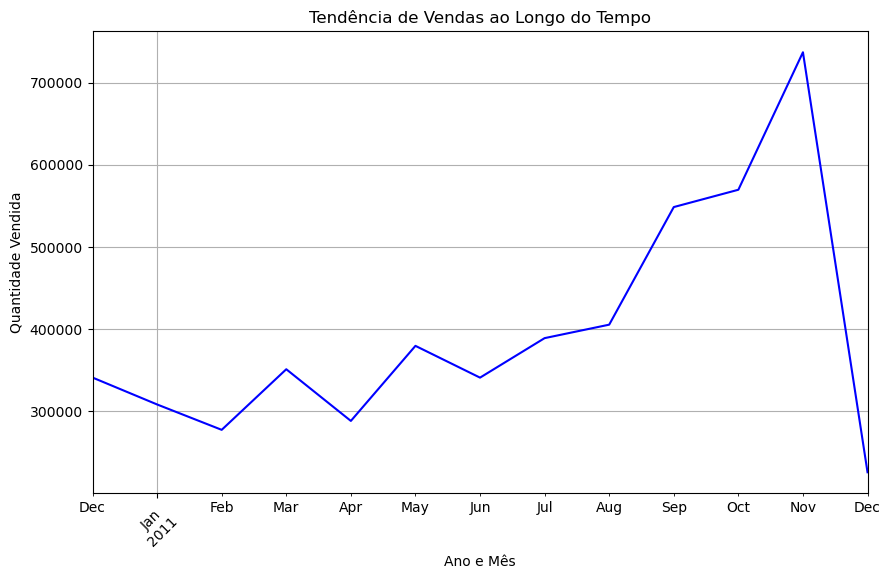

In [52]:
# Tendências sazonais
import matplotlib.pyplot as plt

vendas_sazonais = df_limpo.groupby('Ano_Mes')['Quantity'].sum()

plt.figure(figsize=(10,6))
vendas_sazonais.plot(kind='line', color='blue')
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Ano e Mês')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 3 Visualizações de gráficos

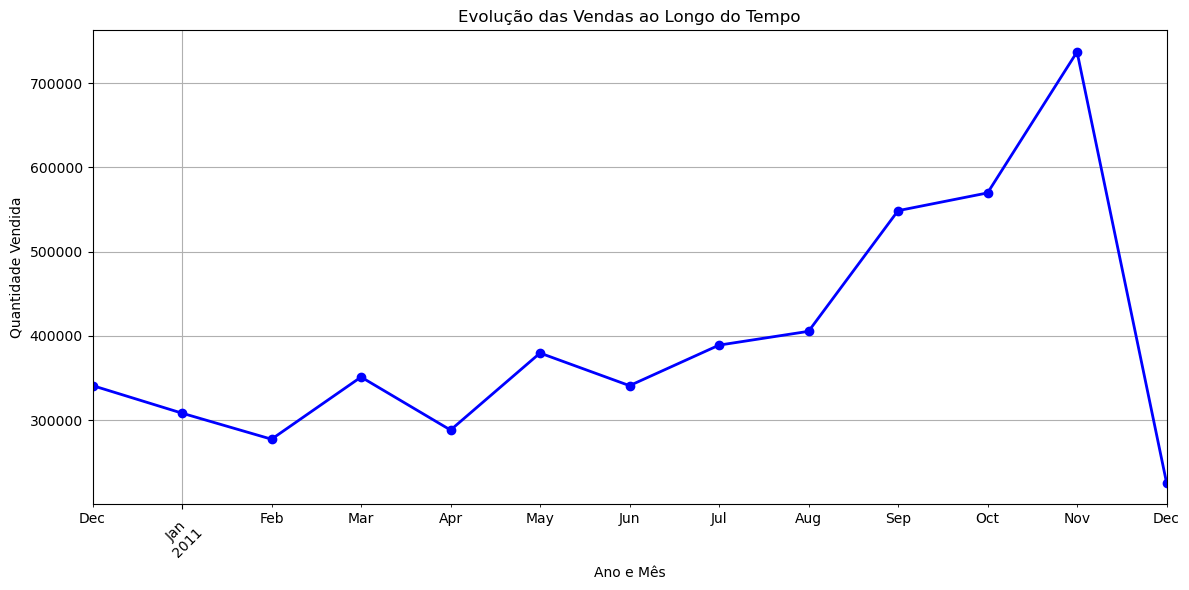

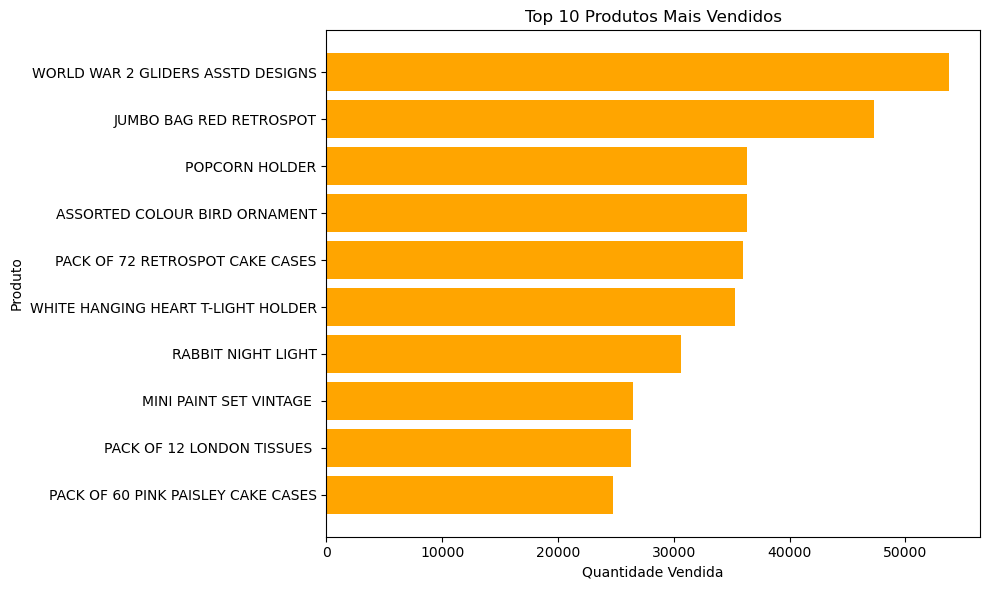

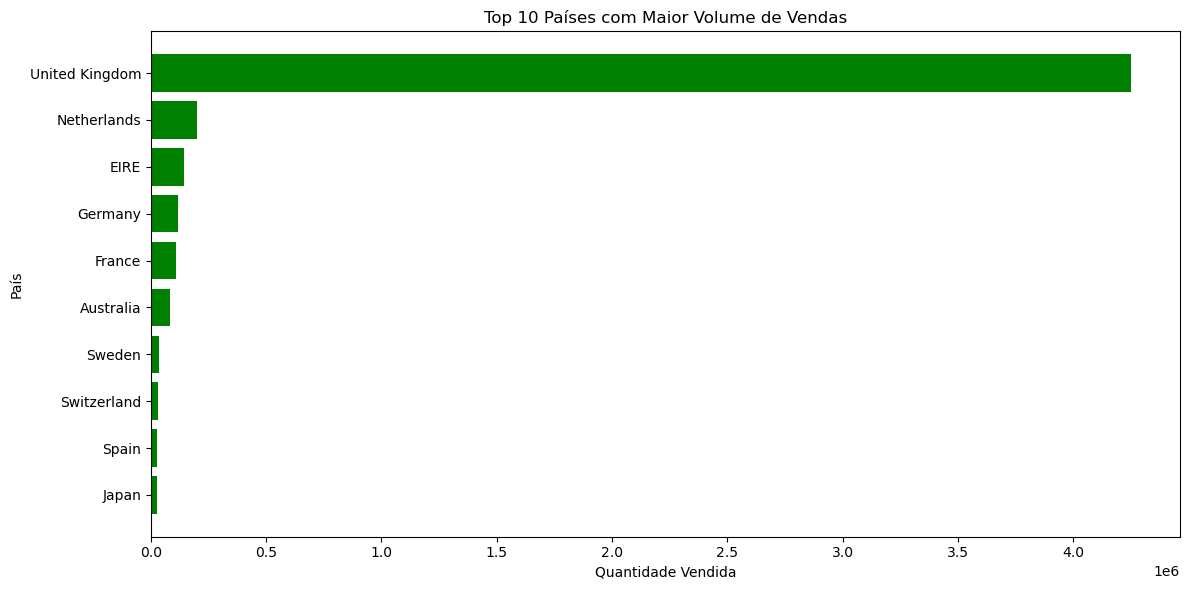

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Evolução das Vendas ao Longo do Tempo
df_limpo['InvoiceDate'] = pd.to_datetime(df_limpo['InvoiceDate'])

df_limpo['Ano_Mes'] = df_limpo['InvoiceDate'].dt.to_period('M')

vendas_por_periodo = df_limpo.groupby('Ano_Mes')['Quantity'].sum()

plt.figure(figsize=(12, 6))
vendas_por_periodo.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=2)
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Ano e Mês')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Principais Produtos e Categorias
produtos_mais_vendidos = df_limpo.groupby('Description')['Quantity'].sum().reset_index()
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='Quantity', ascending=False)
top_10_produtos = produtos_mais_vendidos.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_produtos['Description'], top_10_produtos['Quantity'], color='orange')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Distribuição geográfica das vendas
vendas_por_pais = df_limpo.groupby('Country')['Quantity'].sum().reset_index()
vendas_por_pais = vendas_por_pais.sort_values(by='Quantity', ascending=False)
top_10_paises = vendas_por_pais.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_paises['Country'], top_10_paises['Quantity'], color='green')
plt.title('Top 10 Países com Maior Volume de Vendas')
plt.xlabel('Quantidade Vendida')
plt.ylabel('País')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4 Manipulação de arquivos

In [43]:
# Gera relatório em CSV 
import pandas as pd

# Relatório 1: Vendas por Período (Ano/Mês)
vendas_por_periodo = df_limpo.groupby('Ano_Mes')['Quantity'].sum().reset_index()
vendas_por_periodo.to_csv('vendas_por_periodo.csv', index=False)

# Relatório 2: Produtos Mais Vendidos
produtos_mais_vendidos = df_limpo.groupby('Description')['Quantity'].sum().reset_index()
produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='Quantity', ascending=False)
produtos_mais_vendidos.to_csv('produtos_mais_vendidos.csv', index=False)

# Relatório 3: Distribuição Geográfica das Vendas
vendas_por_pais = df_limpo.groupby('Country')['Quantity'].sum().reset_index()
vendas_por_pais = vendas_por_pais.sort_values(by='Quantity', ascending=False)
vendas_por_pais.to_csv('vendas_por_pais.csv', index=False)

In [53]:
import pandas as pd
import json

# Ler arquivo CSV com dados de vendas
df = pd.read_csv('./data/data.csv', encoding="ISO-8859-1")

# Ler arquivo de configuração JSON
with open('./docs/config.json', 'r') as f:
    config = json.load(f)

def gerar_relatorio(df, tipo, agrupamento, coluna, ordem, arquivo_saida):
    relatorio = df.groupby(agrupamento)[coluna].sum().reset_index()
    
    if ordem == "decrescente":
        relatorio = relatorio.sort_values(by=coluna, ascending=False)
    else:
        relatorio = relatorio.sort_values(by=coluna, ascending=True)
    
    relatorio.to_csv(arquivo_saida, index=False)
    print(f'Relatório "{tipo}" gerado em {arquivo_saida}')

for relatorio in config['relatorios']:
    gerar_relatorio(
        df,
        relatorio['tipo'],
        relatorio['agrupamento'],
        relatorio['coluna'],
        relatorio['ordem'],
        relatorio['arquivo_saida']
    )

Relatório "vendas_por_periodo" gerado em vendas_por_periodo.csv
Relatório "produtos_mais_vendidos" gerado em produtos_mais_vendidos.csv
Relatório "vendas_por_pais" gerado em vendas_por_pais.csv


# 5 Conexão com Banco de Dados Oracle

In [56]:
pip install oracledb

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 1.2 MB/s eta 0:00:02
   ----------------------------- ---------- 1.3/1.8 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 12.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [60]:
import oracledb

# Configuração da conexão com o banco de dados Oracle
def conectar_oracle():
    try:
        connection = oracledb.connect(
            user="rm555625",
            password="100203",
            dsn="oracle.fiap.com.br:1521/orcl"
        )
        print("Conexão bem-sucedida!")
        return connection
    except oracledb.DatabaseError as e:
        print(f"Erro de conexão: {e}")
        return None

connection = conectar_oracle()

def criar_tabelas(connection):
    try:
        cursor = connection.cursor()

        cursor.execute("""
        CREATE TABLE clientes (
            customer_id NUMBER PRIMARY KEY,
            country VARCHAR2(100)
        )
        """)

        cursor.execute("""
        CREATE TABLE produtos (
            stock_code VARCHAR2(50) PRIMARY KEY,
            description VARCHAR2(255),
            unit_price NUMBER
        )
        """)

        cursor.execute("""
        CREATE TABLE vendas (
            invoice_no VARCHAR2(50),
            stock_code VARCHAR2(50),
            quantity NUMBER,
            invoice_date DATE,
            customer_id NUMBER,
            PRIMARY KEY (invoice_no, stock_code),
            FOREIGN KEY (customer_id) REFERENCES clientes (customer_id),
            FOREIGN KEY (stock_code) REFERENCES produtos (stock_code)
        )
        """)

        connection.commit()
        print("Tabelas criadas com sucesso!")

    except oracledb.DatabaseError as e:
        print(f"Erro ao criar tabelas: {e}")
        connection.rollback()

if connection:
    criar_tabelas(connection)

Conexão bem-sucedida!
Erro ao criar tabelas: ORA-00955: name is already used by an existing object
Help: https://docs.oracle.com/error-help/db/ora-00955/


In [63]:
def inserir_dados(connection, dados_clientes, dados_produtos, dados_vendas):
    try:
        cursor = connection.cursor()

        # Inserir dados na tabela de clientes
        for cliente in dados_clientes:
            cursor.execute("""
            INSERT INTO clientes (customer_id, country)
            VALUES (:1, :2)
            """, (cliente['customer_id'], cliente['country']))

        # Inserir dados na tabela de produtos
        for produto in dados_produtos:
            cursor.execute("""
            INSERT INTO produtos (stock_code, description, unit_price)
            VALUES (:1, :2, :3)
            """, (produto['stock_code'], produto['description'], produto['unit_price']))

        # Inserir dados na tabela de vendas
        for venda in dados_vendas:
            cursor.execute("""
            INSERT INTO vendas (invoice_no, stock_code, quantity, invoice_date, customer_id)
            VALUES (:1, :2, :3, TO_DATE(:4, 'YYYY-MM-DD HH24:MI'), :5)
            """, (venda['invoice_no'], venda['stock_code'], venda['quantity'], venda['invoice_date'], venda['customer_id']))

        # Confirmar a transação
        connection.commit()  # Não há necessidade de BEGIN TRANSACTION
        print("Dados inseridos com sucesso!")

    except oracledb.DatabaseError as e:
        print(f"Erro ao inserir dados: {e}")
        connection.rollback()

# Exemplo de dados a serem inseridos
dados_clientes = [
    {'customer_id': 17850, 'country': 'United Kingdom'}
]

dados_produtos = [
    {'stock_code': '85123A', 'description': 'WHITE HANGING HEART T-LIGHT HOLDER', 'unit_price': 2.55},
    {'stock_code': '71053', 'description': 'WHITE METAL LANTERN', 'unit_price': 3.39}
]

dados_vendas = [
    {'invoice_no': '536365', 'stock_code': '85123A', 'quantity': 6, 'invoice_date': '2010-12-01 08:26', 'customer_id': 17850},
    {'invoice_no': '536365', 'stock_code': '71053', 'quantity': 6, 'invoice_date': '2010-12-01 08:26', 'customer_id': 17850}
]

# Inserir os dados no banco
if connection:
    inserir_dados(connection, dados_clientes, dados_produtos, dados_vendas)

def fechar_conexao(connection):
    if connection:
        connection.close()
        print("Conexão fechada.")

# Fechar a conexão
fechar_conexao(connection)

Dados inseridos com sucesso!


# 6 Consultas e Operações em SQL

In [69]:
# 5 clientes com maior faturamento total
def clientes_maior_faturamento(connection):
    try:
        cursor = connection.cursor()
        
        # Consulta SQL para obter os 5 clientes com maior faturamento total
        query = """
        SELECT c.customer_id, 
               c.country, 
               SUM(v.quantity * p.unit_price) AS total_faturamento
        FROM vendas v
        JOIN produtos p ON v.stock_code = p.stock_code
        JOIN clientes c ON v.customer_id = c.customer_id
        GROUP BY c.customer_id, c.country
        ORDER BY total_faturamento DESC
        FETCH FIRST 5 ROWS ONLY
        """
        
        cursor.execute(query)
        results = cursor.fetchall()

        # Exibir os resultados
        print("Top 5 clientes com maior faturamento:")
        for row in results:
            print(f"Cliente ID: {row[0]}, País: {row[1]}, Faturamento Total: {row[2]:.2f}")
    
    except oracledb.DatabaseError as e:
        print(f"Erro ao executar a consulta: {e}")

# Produto teve o maior aumento de vendas no último trimestre
def produto_maior_aumento_vendas(connection):
    try:
        cursor = connection.cursor()

        # Consulta SQL para calcular o aumento de vendas no último trimestre
        query = """
        SELECT p.description,
               SUM(CASE WHEN EXTRACT(YEAR FROM v.invoice_date) = EXTRACT(YEAR FROM SYSDATE) AND 
                             EXTRACT(QUARTER FROM v.invoice_date) = 4 THEN v.quantity ELSE 0 END) AS vendas_q4,
               SUM(CASE WHEN EXTRACT(YEAR FROM v.invoice_date) = EXTRACT(YEAR FROM SYSDATE) AND 
                             EXTRACT(QUARTER FROM v.invoice_date) = 3 THEN v.quantity ELSE 0 END) AS vendas_q3,
               (SUM(CASE WHEN EXTRACT(YEAR FROM v.invoice_date) = EXTRACT(YEAR FROM SYSDATE) AND 
                             EXTRACT(QUARTER FROM v.invoice_date) = 4 THEN v.quantity ELSE 0 END) -
                SUM(CASE WHEN EXTRACT(YEAR FROM v.invoice_date) = EXTRACT(YEAR FROM SYSDATE) AND 
                             EXTRACT(QUARTER FROM v.invoice_date) = 3 THEN v.quantity ELSE 0 END)) AS aumento_vendas
        FROM vendas v
        JOIN produtos p ON v.stock_code = p.stock_code
        GROUP BY p.description
        ORDER BY aumento_vendas DESC
        FETCH FIRST 1 ROWS ONLY
        """

        cursor.execute(query)
        result = cursor.fetchone()

        # Exibir o resultado
        if result:
            print(f"Produto com maior aumento de vendas: {result[0]}")
            print(f"Aumento de vendas: {result[3]} unidades (Q4 vs Q3)")
        else:
            print("Nenhum resultado encontrado.")
    
    except oracledb.DatabaseError as e:
        print(f"Erro ao executar a consulta: {e}")

# Região apresenta o maior potencial para expansão
def maior_potencial_expansao(connection):
    try:
        cursor = connection.cursor()

        # Consulta SQL para determinar a região com maior potencial de expansão
        query = """
        SELECT c.country,
               SUM(v.quantity * p.unit_price) AS total_vendas
        FROM vendas v
        JOIN produtos p ON v.stock_code = p.stock_code
        JOIN clientes c ON v.customer_id = c.customer_id
        GROUP BY c.country
        ORDER BY total_vendas DESC
        FETCH FIRST 1 ROWS ONLY
        """
        
        cursor.execute(query)
        result = cursor.fetchone()

        # Exibir o resultado
        if result:
            print(f"Região com maior potencial de expansão: {result[0]}")
            print(f"Total de vendas: {result[1]:.2f}")
        else:
            print("Nenhum resultado encontrado.")
    
    except oracledb.DatabaseError as e:
        print(f"Erro ao executar a consulta: {e}")

# Executar consulta

connection = conectar_oracle()
if connection:
    clientes_maior_faturamento(connection)
    produto_maior_aumento_vendas(connection)
    maior_potencial_expansao(connection)
    connection.close()

Conexão bem-sucedida!
Top 5 clientes com maior faturamento:
Cliente ID: 17850, País: United Kingdom, Faturamento Total: 35.64
Erro ao executar a consulta: ORA-00907: missing right parenthesis
Help: https://docs.oracle.com/error-help/db/ora-00907/
Região com maior potencial de expansão: United Kingdom
Total de vendas: 35.64
